In [54]:
import numpy as np
import matplotlib.pyplot as plt
import qiskit

## Ignis
Ignis framework that contains various functionalities such as characterization, verification and mitigation.

### Generating Noise effects of relaxation

noise type as decoherence.
3 main types of decoherence are
- $T_1$ relaxation
- $T_2/T_2^*$ dephasing

for the $T_1$ we can make a qubit in 0 and apply X gate to make it 1 and then wait for certain amount of time before measuring the qubit.

(( 1 )) insert an identity gate with a fixed gate time. and how to determine how many identity gates for that `t1_circuits()`

In [55]:
from qiskit_aer.noise import NoiseModel
from qiskit_aer.noise.errors.standard_errors import amplitude_damping_error, phase_damping_error

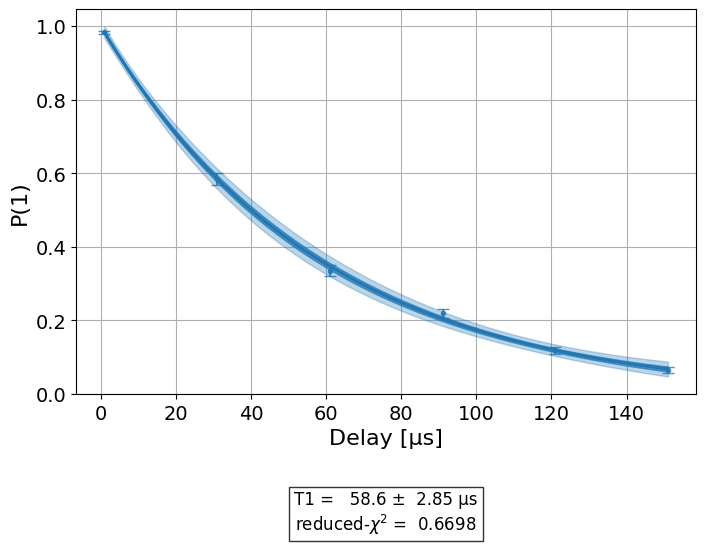

         name experiment components              value quality  \
b4817f59   T1         T1       [Q0]  (5.86+/-0.28)e-05    good   

                                 backend run_time     chisq unit  
b4817f59  aer_simulator_from(fake_perth)     None  0.669797    s  


In [56]:
import numpy as np
from qiskit_experiments.library import T1

# A T1 simulator
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel
from qiskit_ibm_runtime.fake_provider import FakePerth


# Create a pure relaxation noise model for AerSimulator
noise_model = NoiseModel.from_backend(
    FakePerth(), thermal_relaxation=True, gate_error=False, readout_error=False
)

# Create a fake backend simulator
backend = AerSimulator.from_backend(FakePerth(), noise_model=noise_model)

# Look up target T1 of qubit-0 from device properties
qubit0_t1 = FakePerth().qubit_properties(0).t1

# Time intervals to wait before measurement
delays = np.arange(1e-6, 3 * qubit0_t1, 3e-5)
# Create an experiment for qubit 0
# with the specified time intervals
exp = T1(physical_qubits=(0,), delays=delays)

# Set scheduling method so circuit is scheduled for delay noise simulation
exp.set_transpile_options(scheduling_method='asap')

# Run the experiment circuits and analyze the result
exp_data = exp.run(backend=backend, seed_simulator=101).block_for_results()

# Print the result
display(exp_data.figure(0))
print(exp_data.analysis_results(dataframe=True))

In [57]:
qubit0_t1

5.592927874207379e-05

In [58]:
len(exp.circuits())

6

In [59]:
delays

array([1.00e-06, 3.10e-05, 6.10e-05, 9.10e-05, 1.21e-04, 1.51e-04])

In [60]:
exp.circuits()[0].draw()

┌───┐ ░ ┌─────────────────┐ ░ ┌─┐
  q: ┤ X ├─░─┤ Delay(1e-06[s]) ├─░─┤M├
     └───┘ ░ └─────────────────┘ ░ └╥┘
c: 1/═══════════════════════════════╩═
                                    0

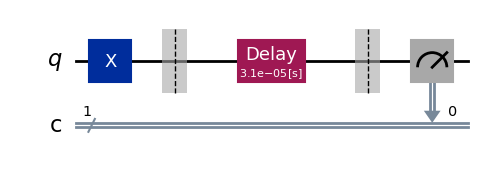

In [61]:
exp.circuits()[1].draw('mpl')


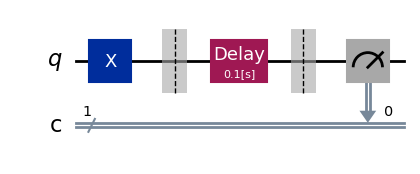

In [62]:
#------------FROM HERE----------------
num_of_gates = np.append((np.linspace(1, 100, 12)).astype(int), np.array([200,400,800,1000,2000,4000]))
gate_time = 0.1

qubits = [0]

exp = T1(physical_qubits=qubits, delays=num_of_gates*gate_time)
exp.circuits()[0].draw('mpl')

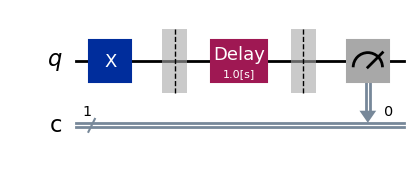

In [63]:
exp.circuits()[1].draw('mpl')

In [64]:
import qiskit_aer
import qiskit.visualization as vis

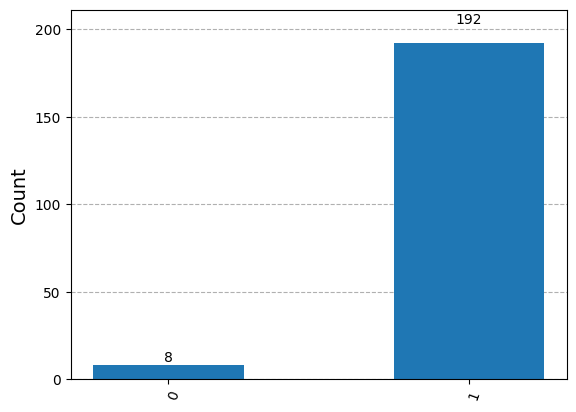

In [112]:
t1 = 20
lam = np.exp(-gate_time/t1)
err = amplitude_damping_error(1-lam)


noise_model.add_quantum_error(err, ['id', 'x'], [0])


res = backend.run(exp.circuits()[0], noise_model=noise_model, shots=200).result().get_counts()
vis.plot_histogram(res)

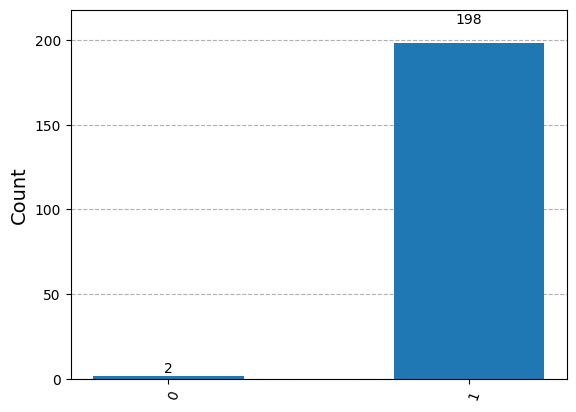

In [115]:

res = backend.run(exp.circuits()[len(exp.circuits())-1], noise_model=noise_model, shots=200).result().get_counts()
vis.plot_histogram(res)

### Estimating $T_1$ decoherence time

### Generating the noise effects of dephasing

### Estimating $T_2$ decoherence time

### Estimating $T_2$ * ($T_2$ star) decoherence time

### Visualizing the $T_1$, $T_2$, and $T_2^*$ decoherence times

### Mitigating readout errors using measurement calibrations